In [21]:
import os
import data_loader as dl
import correlation_plot as cp
import profile_plot as dp
import express_statistic_plot as es
import trf_type_barplot as tt
import read_statistic as rs
import pylab

%matplotlib inline


'''
# Visualization module of tRNAExploer (v1.0) 
# The visual configure file
'''
#visual_config = "/Users/hqyone/PycharmProjects/data_output/server2/visual_config.tsv"
#visual_config = "/Users/hqyone/PycharmProjects/data_output/tRNA_seq/output/visual_config.tsv"
#visual_config = "/Users/hqyone/PycharmProjects/data_output/cancer/output/visual_config.tsv"
visual_config = "/Users/hqyone/PycharmProjects/tRNAExplorer/test/output/visual_config.tsv"
if not os.path.isfile(visual_config):
    print("Can't find config file. Abort !")
    exit(-1)

# If you don't set report_dir, the default path will be <output_dir>+"/reports"
report_dir = ""

# Loading data
d =  dl.LoadConfig(visual_config, report_dir)

/Users/hqyone/PycharmProjects/tRNAExplorer/test/output/static.log


/Users/hqyone/PycharmProjects/tRNAExplorer/visualization/clusterMatrix.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


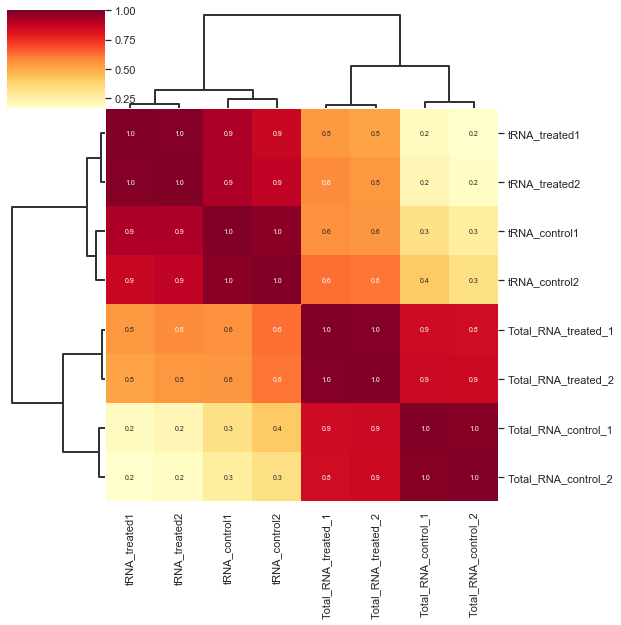

In [22]:
'''
    The function creates a correlation matrix to show the relationship between samples
    @param d:  The data object generated by data_loader.py
    @param type: "count"/"pileup" the matrix used for calculated correlation matrix. "count" means using read counts or
                 "pileup" means use the max depth of pileup to indicate abundance and calculate the matrix.
    @param label: "des" label with sample description or others with ID of samples.
    @param groupby: group by can be "CODE_AA","AA","CODE" or "tRNA_Families" 
                    It determines the way summing the value based on the column and then calculate correlation.
    @param method: The method to calculate correlation (pearson, kendall, spearman)
    @param font_size: The size of text in matrix
    @return: None
'''
cp.drawCorrMatrixPic(d,
                     type="count", 
                     label="des",
                     groupby="CODE_AA",
                     method="pearson",
                     font_size=7)

tRNA_control1>>SRR1836123>>tRNA-Gln-TTG-3-3>>M:A>T:117=28.25


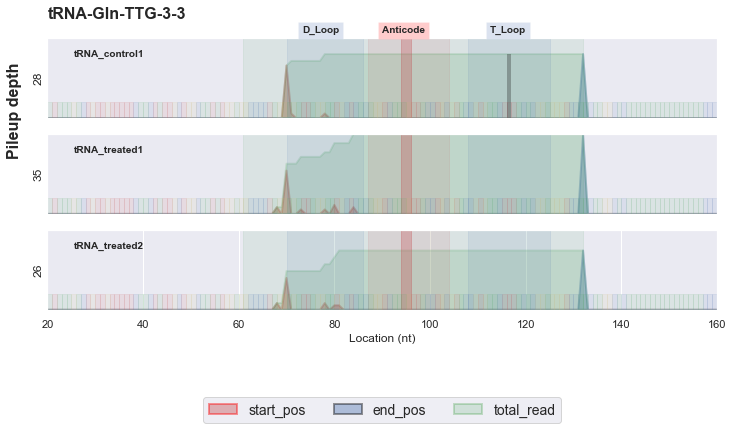

In [23]:
'''
    Draw tRF profiles for each tRNA across samples
    @param d: The data object generated by data_loader.py
    @param test: Boolean, If true only prints the first profile for testing
                 or print all profiles in output_dir
    @param output_dir: The output directory. The default is <output_dir>/reports
    @param min_depth: The minimum depth of pileup for a sample to print the profile (Default 20)
    @param share_y_lim: Whether all profiles share the same depth limitation across samples (Default True)
    @param normalized: whether normalize to the number of total tRNA mapped reads (Default True)
    @return:
'''
dp.drawProfiles(d, 
                test = True,
                output_dir="",
                min_depth=20,
                share_y_lim = True,
                normalized = False
                )

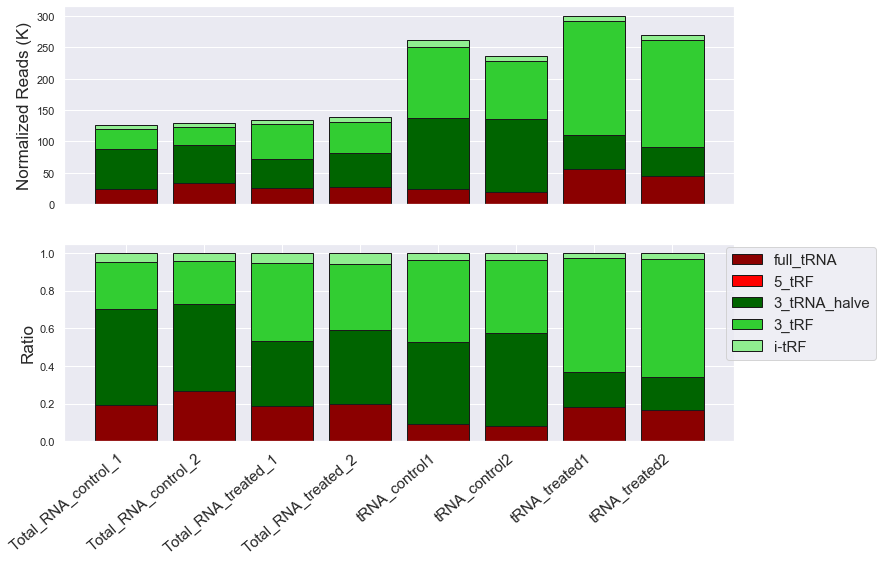

<Figure size 1080x1080 with 0 Axes>

In [24]:
'''
    Create two stack bar charts to show the composition of tRFs in samples
    @param d: The data object generated by data_loader.py
    @param fontsize: The size of font of x, y axis and labels
    @return: None
'''
tt.drawTrfDistForSamples(d, 15)

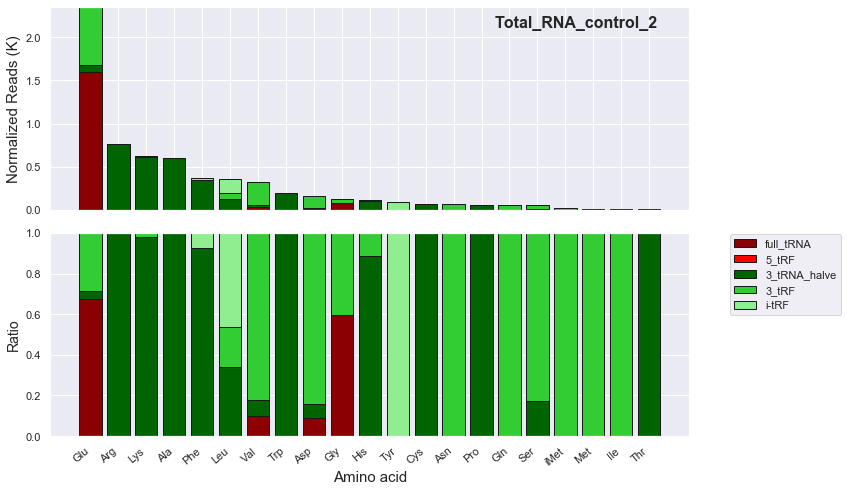

Finished


In [25]:
'''
    Create two stack bar charts to show the composition of tRFs for each acceptor in a samples
    @param d: The data object generated by data_loader.py
    @param test: Boolean, If true only print the stack bar charts for first sample for testing purposes
                 or print all profiles in output_dir with <report_dir> + "/" + s_id + '_aa.png'
    @return: None
'''
tt.drawTrfDistForAcceptorsInSamples(d, test=True)

Available Samples :SRR1836128,SRR1836129,SRR1836123,SRR1836124,SRR1836125,SRR1836126,SRR1836130,SRR1836127


/Users/hqyone/PycharmProjects/tRNAExplorer/visualization/express_statistic_plot.py:201: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  group['len'], group['str_code'] = group['tRF_ID'].str.split('-', 1).str


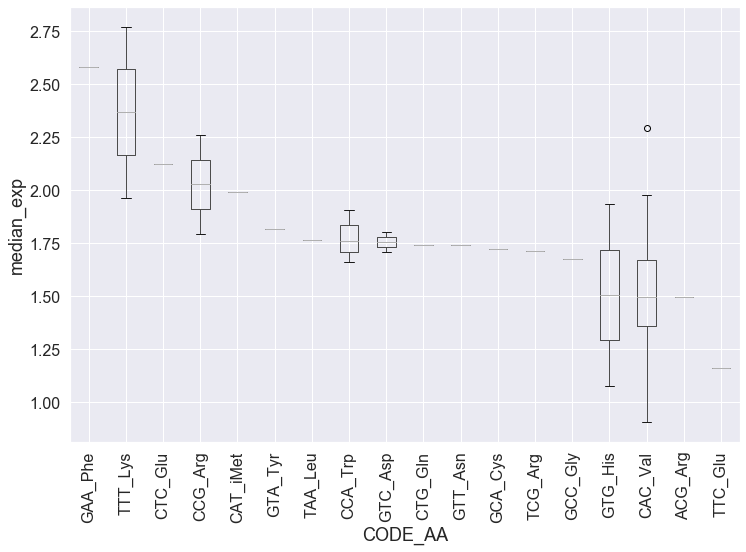

In [26]:
'''
    Create a box plot to compare expression level of tRFs in multiple levels
    The program will calculate max_exp (max value of expression), exp_samples_num (The number of sample expressed the tRF)
    or median_exp (median expression across samples) and then group by certain features set by "groupby"
    to plot a box plot to compare expression between different groups
    @param d: The data object generated by data_loader.py
    @param min_exp_cutoff: The minimum of read count for a sample to express the tRFs
    @param sample_ls: A list of IDs of selected sample, if it is empty, it will use all data from all available samples
    @param groupby: feature for group can be one of them ["tRF_First_Type","exp_samples","tRNA_families","CODE","CODE_AA","AA"]
    @param value: The way to calculate the expression ["]median_exp","exp_samples_num","max_exp"]
    @param fontsize: Font size (Default 14)
    @param fig_w: weight of figure (12)
    @param fig_h: height of figure (8)
    @return: None
'''
sample_ls=[]
# sample_ls=['ENCFF126QMV.sorted,ENCFF338LGX.sorted,ENCFF848JOE.sorted,ENCFF894FTI.sorted,ENCFF536JJC.sorted']
# groupby can be "tRF_First_Type","CODE_AA","AA","CODE","tRNA_Family","CODE_AA"
es.drawExpBoxPlotForGroup(d,
                          min_exp_cutoff=50,
                          sample_ls=sample_ls, 
                          groupby="CODE_AA",
                          value="median_exp",
                          fontsize = 16,
                          fig_w = 12,
                          fig_h = 8
                         )

Available Samples :SRR1836128,SRR1836129,SRR1836123,SRR1836124,SRR1836125,SRR1836126,SRR1836130,SRR1836127
Selected Samples :SRR1836128,SRR1836129,SRR1836123,SRR1836124,SRR1836125,SRR1836126,SRR1836130,SRR1836127


/Users/hqyone/PycharmProjects/tRNAExplorer/visualization/clusterMatrix.py:205: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


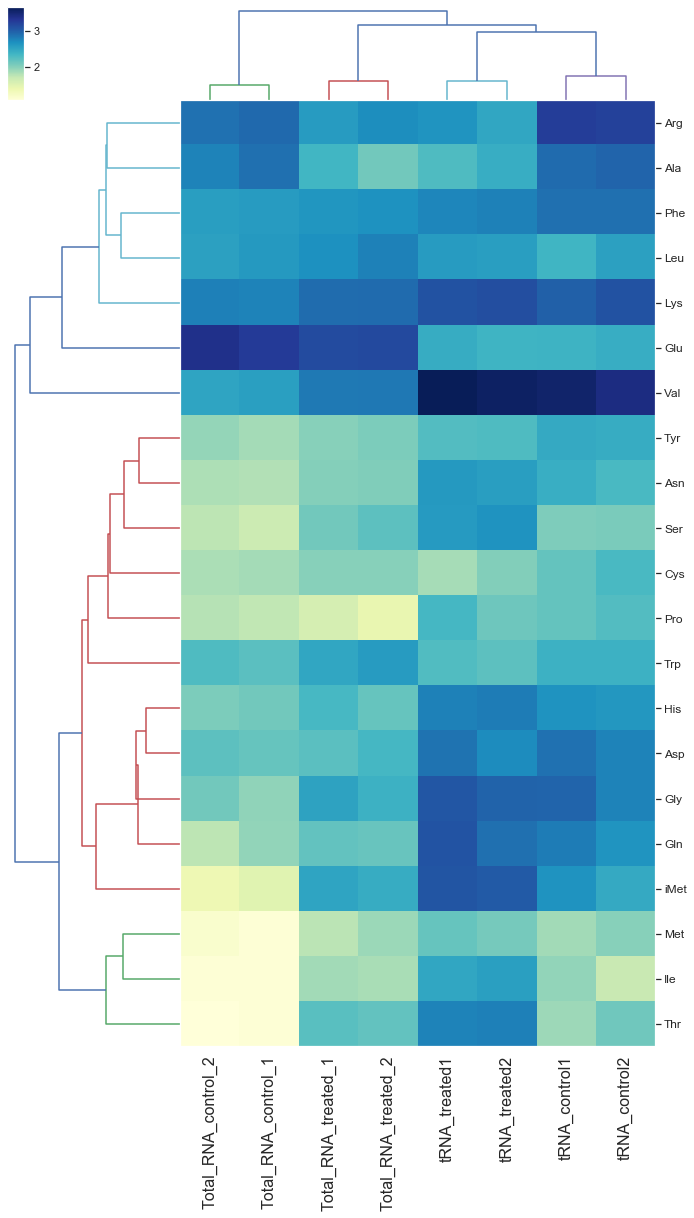

In [27]:
'''
    Create expression matrix of tRNA/Group/Acceptors vs samples
    The expression levels were transformed by log10
    @param d: The data object generated by data_loader.py
    @param figure: Absolute path of output figure, Default : report_dir+"/exp_matrix.png"
    @param sample_ls: selected sample ID list, if it is empty, it will use all data from all available samples
    @param groupby: "tRF_First_Type","CODE_AA","AA","CODE","tRNA_Families","CODE_AA","tRNA_ID"
    @param xl_method: the linkage method for x axis
    @param yl_method: the linkage method for y axis
    @param xaxis_font_size: the linkage method for x axis
    @param yaxis_font_size: the linkage method for y axis
    @param cmap: the colormap of the matrix
    @param fontsize: Font size (Default 14)
    @param fig_w: weight of figure (12)
    @param fig_h: height of figure (18)
    @return: None
'''

# sample_ls=['SRR1836127','SRR1836126','SRR1836128','SRR1836129','SRR1836123']
sample_ls=[]
es.drawExpMatrixForFamily(d,
                          figure = "matrix.png",
                          sample_ls = sample_ls,
                          groupby='AA',
                          xl_method = "single",
                          yl_method = "centroid", #single
                          xaxis_font_size=12,
                          yaxis_font_size=12,
                          cmap=pylab.cm.YlGnBu,
                          fig_w = 12,
                          fig_h = 18
                          )



Available Samples :SRR1836128,SRR1836129,SRR1836123,SRR1836124,SRR1836125,SRR1836126,SRR1836130,SRR1836127
Selected Samples :SRR1836128,SRR1836129,SRR1836123,SRR1836124,SRR1836125,SRR1836126,SRR1836130,SRR1836127


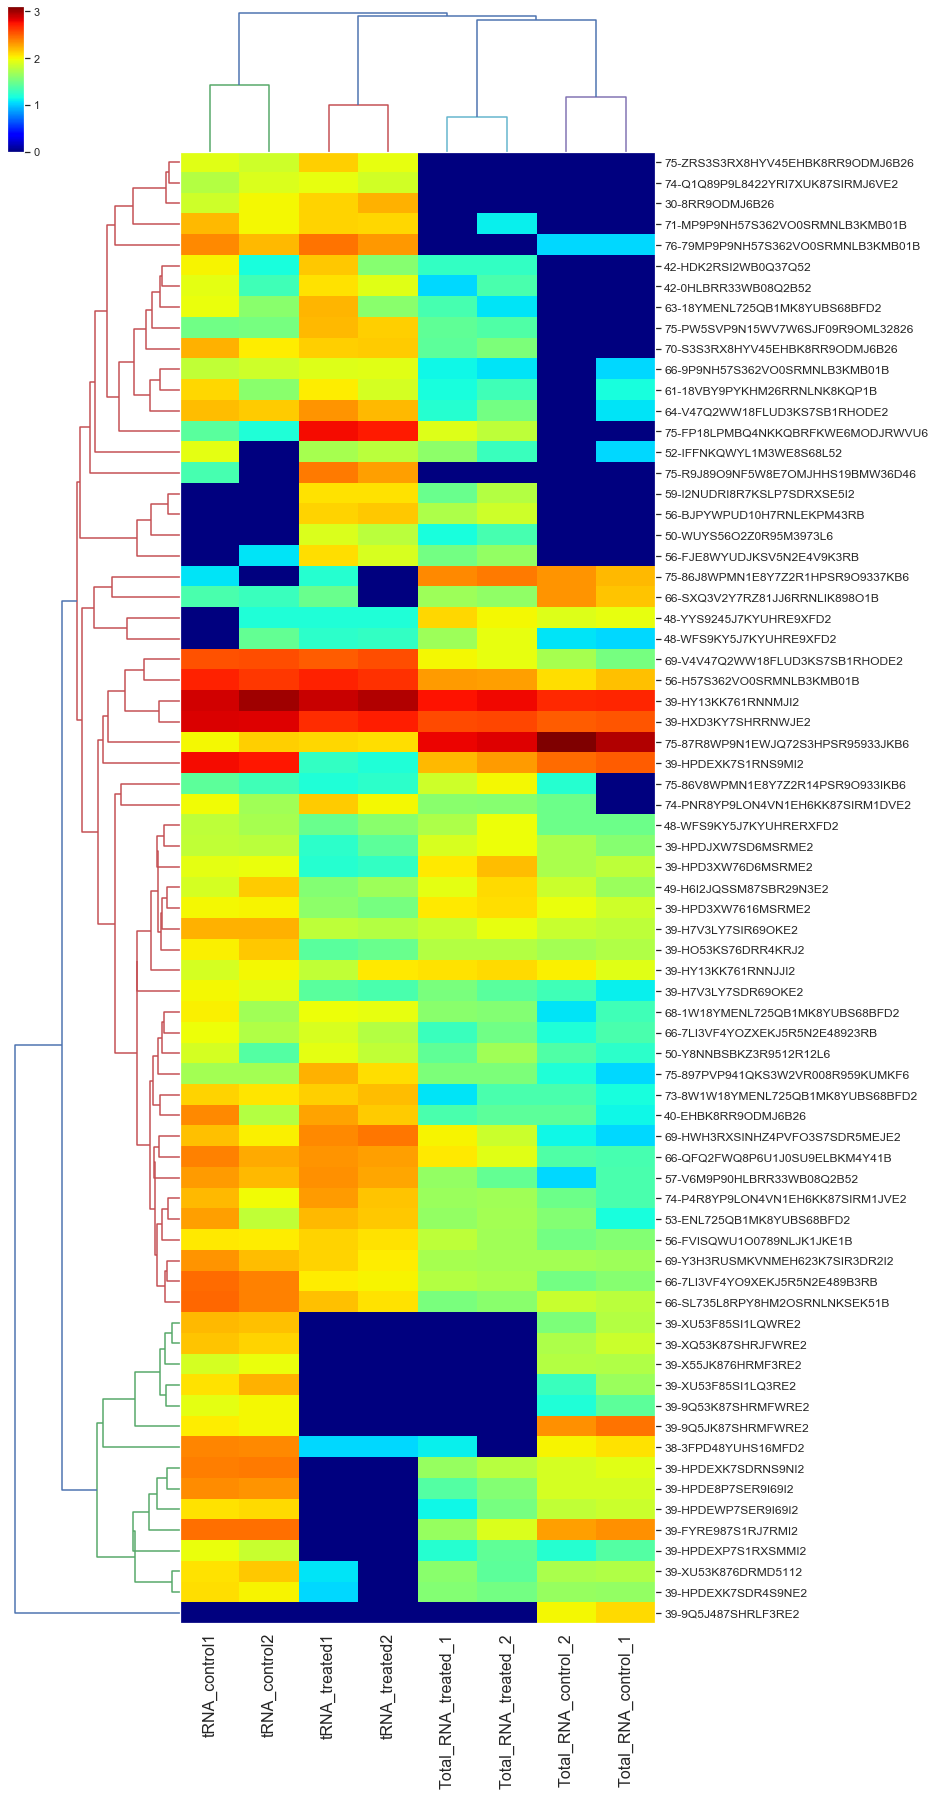

In [28]:
'''
    Create expression matrix of tRFs vs samples
    The expression levels were transformed by log10
    @param d: The data object generated by data_loader.py
    @param figure: Absolute path of output figure, Default : report_dir+"/exp_matrix.png"
    @param sample_ls: selected sample ID list, if it is empty, it will use all data from all available samples
    @param xl_method: the linkage method for x axis
    @param yl_method: the linkage method for y axis
    @param xaxis_font_size: the linkage method for x axis
    @param yaxis_font_size: the linkage method for y axis
    @param cmap: the colormap of the matrix, the list can be found at 
        https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
    @param fig_w: weight of figure (12)
    @param fig_h: height of figure (18)
    @param min_int: minimum of the mean read counts of tRF 
    @return: None
'''
# sample_ls=['SRR1836127','SRR1836126','SRR1836128','SRR1836129','SRR1836123']

sample_ls=[]
es.drawTrfExpMatrixForSample(d,
                            figure = "trf_matrix.png",
                            sample_ls = sample_ls,
                            xl_method = "single",
                            yl_method = "centroid", #single
                            xaxis_font_size=12,
                            yaxis_font_size=12,
                            cmap=pylab.cm.jet,
                            fig_w = 12,
                            fig_h = 28,
                            min_int = 10
                          )




Available Samples :SRR1836128,SRR1836129,SRR1836123,SRR1836124,SRR1836125,SRR1836126,SRR1836130,SRR1836127
Selected Samples :SRR1836128,SRR1836129,SRR1836123,SRR1836124,SRR1836125,SRR1836126,SRR1836130,SRR1836127


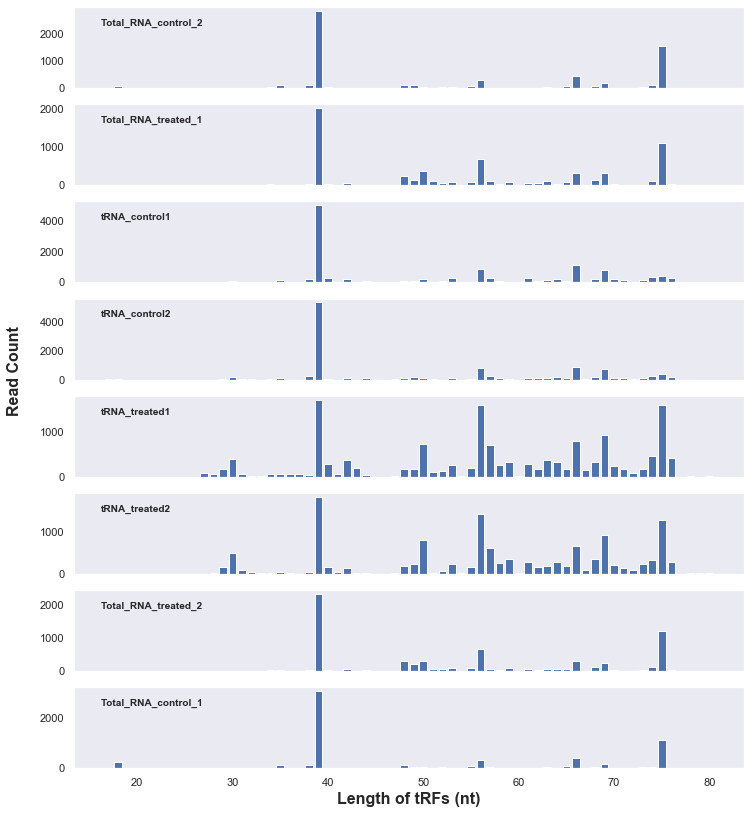

In [29]:
'''
    Draw bar charts for Type/Count of tRF for each samples
    @param d: The data object generated by data_loader.py
    @param sample_ls: selected sample ID list
    @param type: 'read_count' for draw bar chart for read count, others will draw tRF types
    @return:
'''
sample_ls=[]
#sample_ls=['ENCFF536JJC.sorted','ENCFF656GZF.sorted','ENCFF894FTI.sorted','ENCFF110BEH.sorted']
es.drawTrfLengthDistribution(d,
                             sample_ls=sample_ls,
                             type="read_count"
                             )



SRR1836123_tRNA_control1
read_5_fragment
T          1229.004
C           146.002
TC          124.003
TT          119.003
TG           55.005
AT           24.002
TTTG         16.000
CA           12.000
GCGGATT      12.000
CT           11.997
Name: mean_number, dtype: float64
read_3_fragment
GGAGGTCCTGTGTTCGATCCACAGAATTCGCACCA    12.0
Name: mean_number, dtype: float64

SRR1836124_tRNA_control2
read_5_fragment
T          868.003
TC         107.000
C           88.996
TT          77.998
TG          77.003
TTTG        14.000
GCGGATT     13.000
CC          12.000
AT          10.000
Name: mean_number, dtype: float64
read_3_fragment
GGAGGTCCTGTGTTCGATCCACAGAATTCGCACCA    13.0
CCCTTCGTGGTCGCCA                       11.0
Name: mean_number, dtype: float64

SRR1836125_tRNA_treated1
read_5_fragment
T          2335.008
C           251.008
TC          184.000
TG          138.996
CA           99.998
A            79.002
TT           72.003
AT           25.998
GCGGATT      23.000
CG           19.998
Nam

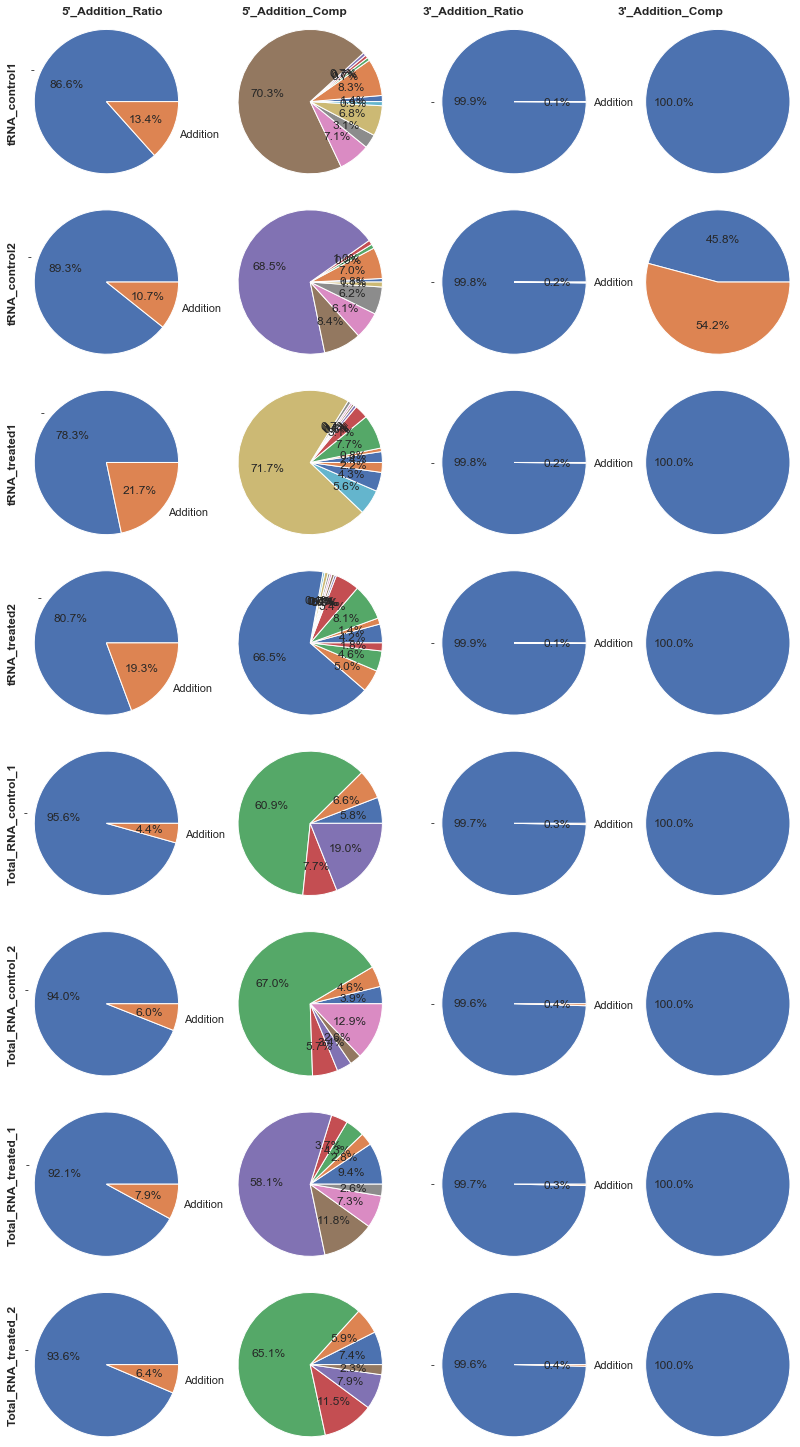

In [30]:
'''
    The function shows the 5' and 3' base addition modifications of tRFs.
    The function will print the top 5' and 3' addition modifications
    And draw four types/columns of pie charts:
        1. Pie charts showing the ratio of tRFs with or without 5'-Addition modification
        2. Pie charts showing the composition of 5'-Addition modifications
        3. Pie charts showing the ratio of tRFs with or without 3'-Addition modification
        4. Pie charts showing the composition of 3'-Addition modifications
    @param d: The data object generated by data_loader.py
    @param proj_name: the name of project, the default is "test", use can check the name of hit.tab file
            it follows the pattern : <sampleID>+"_"+<proj_name>+"_hit.tab"
    @param top_num: The number of top addition modifications to be printed out
    @param radius: the radius of pies
    @param fontsize:
    @param fig_width:
    @return: None
'''
rs.getAddModificationStatisitc(d, 
                               proj_name = 'test',
                               top_num =10,
                               radius =1.2,
                               fontsize = 12,
                               fig_width  =14
                               )

